In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
## Datasets
deliveries=pd.read_csv('C:/Users/SONY/Desktop/IPL/deliveries.csv')
matches=pd.read_csv('C:/Users/SONY/Desktop/IPL/matches.csv')

In [3]:
## Replacing delhi daredevils with delhi capitals
matches.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
deliveries.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
deliveries.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)

In [4]:
## Matches dataset SRH vs DC
df1=matches[np.logical_or(np.logical_and(matches['team1']=='Sunrisers Hyderabad',matches['team2']=='Delhi Capitals'),np.logical_and(matches['team2']=='Sunrisers Hyderabad',matches['team1']=='Delhi Capitals'))]

# Q1.

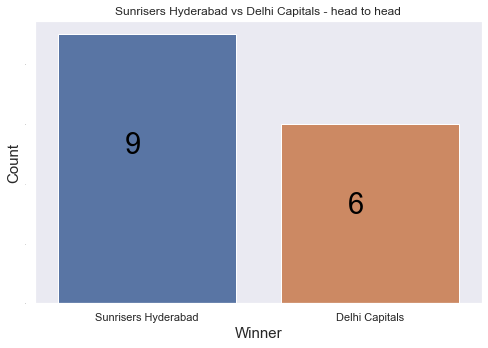

In [5]:
# Head to head SRH vs DC across all season's
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(8,5.2)
sns.countplot(df1['winner'],order=df1['winner'].value_counts().index)
plt.text(-0.1,5,str(df1['winner'].value_counts()['Sunrisers Hyderabad']),size=29,color='black')
plt.text(0.9,3,str(df1['winner'].value_counts()['Delhi Capitals']),size=29,color='black')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('Sunrisers Hyderabad vs Delhi Capitals - head to head')
plt.show()

In [6]:
# Last 2 season performance of both the teams against each other.
last2_seasons=df1[df1.season>=2018]
last2_seasons[['id','winner']]

,id,winner
671,7929,Sunrisers Hyderabad
677,7935,Sunrisers Hyderabad
711,11152,Sunrisers Hyderabad
725,11321,Delhi Capitals
753,11413,Delhi Capitals


In [7]:
# Last two seasons 2018,2019 ipl matches results
winner=last2_seasons.groupby(['winner']).size().reset_index(name='win_counts')
winner=winner.sort_values("win_counts",ascending=False)
winner.groupby("winner").head(2)

,winner,win_counts
1,Sunrisers Hyderabad,3
0,Delhi Capitals,2


In [8]:
## SRH vs DC (deliveries dataset) 
df2=deliveries[np.logical_or(np.logical_and(deliveries['batting_team']=='Sunrisers Hyderabad',deliveries['bowling_team']=='Delhi Capitals'),np.logical_and(deliveries['bowling_team']=='Sunrisers Hyderabad',deliveries['batting_team']=='Delhi Capitals'))]
df2.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [9]:
# Dataframe consisting data of last two seasons only.
matches_last2_seasons=df2[df2.match_id>=7929]
matches_last2_seasons.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
158749,7929,1,Delhi Capitals,Sunrisers Hyderabad,1,1,P Shaw,GJ Maxwell,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
158750,7929,1,Delhi Capitals,Sunrisers Hyderabad,1,2,P Shaw,GJ Maxwell,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
158751,7929,1,Delhi Capitals,Sunrisers Hyderabad,1,3,P Shaw,GJ Maxwell,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
158752,7929,1,Delhi Capitals,Sunrisers Hyderabad,1,4,GJ Maxwell,P Shaw,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
158753,7929,1,Delhi Capitals,Sunrisers Hyderabad,1,5,P Shaw,GJ Maxwell,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Q4.

In [10]:
## Most boundaries in h2h in last 2 season's
def func(playername):
 player = matches_last2_seasons[matches_last2_seasons.batsman == playername]
 boundary_runs_df = player[player.batsman_runs >= 4] 
 boundary_count = boundary_runs_df['batsman_runs'].count()
 matches = player['match_id'].nunique()
 avg_boundaries = (boundary_count/matches).round(1)
 print("Average boundaries in H2H of",playername,'is =',avg_boundaries)

In [11]:
func('P Shaw')
func('SS Iyer')
func('RR Pant')
func('S Dhawan')
func('AR Patel')
func('WP Saha')
func('J Bairstow')
func('DA Warner')
func('HV Patel')
func('KS Williamson')
func('MK Pandey')
func('V Shankar')

Average boundaries in H2H of P Shaw is = 4.0
Average boundaries in H2H of SS Iyer is = 3.0
Average boundaries in H2H of RR Pant is = 6.6
Average boundaries in H2H of S Dhawan is = 4.2
Average boundaries in H2H of AR Patel is = 1.3
Average boundaries in H2H of WP Saha is = 1.0
Average boundaries in H2H of J Bairstow is = 8.5
Average boundaries in H2H of DA Warner is = 2.5
Average boundaries in H2H of HV Patel is = 2.0
Average boundaries in H2H of KS Williamson is = 3.2
Average boundaries in H2H of MK Pandey is = 1.7
Average boundaries in H2H of V Shankar is = 1.8


In [12]:
## Most boundaries in h2h in all season's
def name(playern):
 player_all = df2[df2.batsman == playern]
 boundary_runs_df_all = player_all[player_all.batsman_runs >= 4] 
 boundary_count_all = boundary_runs_df_all['batsman_runs'].count()
 matches_all = player_all['match_id'].nunique()
 avg_boundaries_all = (boundary_count_all/matches_all).round(1)
 print("Average boundaries in H2H of",playern,'is =',avg_boundaries_all)

In [13]:
name('P Shaw')
name('SS Iyer')
name('RR Pant')
name('S Dhawan')
name('AR Patel')
name('WP Saha')
name('J Bairstow')
name('DA Warner')
name('HV Patel')
name('KS Williamson')
name('MK Pandey')
name('V Shankar')

Average boundaries in H2H of P Shaw is = 4.0
Average boundaries in H2H of SS Iyer is = 3.7
Average boundaries in H2H of RR Pant is = 5.1
Average boundaries in H2H of S Dhawan is = 3.9
Average boundaries in H2H of AR Patel is = 1.3
Average boundaries in H2H of WP Saha is = 1.0
Average boundaries in H2H of J Bairstow is = 8.5
Average boundaries in H2H of DA Warner is = 3.2
Average boundaries in H2H of HV Patel is = 2.0
Average boundaries in H2H of KS Williamson is = 4.3
Average boundaries in H2H of MK Pandey is = 1.7
Average boundaries in H2H of V Shankar is = 1.8


# Q5.

In [14]:
## Rashid's wicket's last 2 season against DC
rashid = matches_last2_seasons[matches_last2_seasons.bowler == 'Rashid Khan']
wickets = rashid['player_dismissed'].count()
matches = rashid['match_id'].nunique()
avg_wickets_last2season = (wickets/matches).round(1)
print('Rashid Khan average wickets against DC in last 2 season =',avg_wickets_last2season)

Rashid Khan average wickets against DC in last 2 season = 1.6


In [15]:
## Rashid's wicket's all season against DC
rashid_all = df2[df2.bowler == 'Rashid Khan']
wickets_all = rashid_all['player_dismissed'].count()
matches_all = rashid_all['match_id'].nunique()
avg_wickets_allseason = (wickets_all/matches_all).round(1)
print('Rashid Khan average wickets against DC in all season =',avg_wickets_allseason)

Rashid Khan average wickets against DC in all season = 1.1


# Q3.

In [16]:
## Warner runs in last 7 balls
def match(matchid):
 warner = matches_last2_seasons[matches_last2_seasons.batsman == 'DA Warner']
 warner_match = warner[warner.match_id == matchid]
 last7balls = warner_match.tail(7)
 runs_last7balls = last7balls['batsman_runs'].sum()
 print(runs_last7balls)

In [17]:
## First match last season
match(11152)

4


In [18]:
## Second match last season
match(11321)

6


In [19]:
## Third match last season
match(11413)

0


# Q2.

In [20]:
## Balls taken to score 20 runs once 30 scored for SRH
def over(matchid,over):
 match = matches_last2_seasons[matches_last2_seasons.match_id == matchid]
 match_team_srh = match[match.batting_team == 'Sunrisers Hyderabad']
 overs = match_team_srh[match_team_srh.over <= over]
 runs = overs['batsman_runs'].sum()
 print('Runs scored upto',over,'overs =',runs)   

In [46]:
## Approx overs to score approx 30 runs for SRH
over(11152,4)
over(11321,4)
over(11413,3)

Runs scored upto 4 overs = 36
Runs scored upto 4 overs = 30
Runs scored upto 3 overs = 31


In [22]:
## Approx overs to score 20 from 30 runs for SRH
over(11152,5)
over(11321,7)
over(11413,6)

Runs scored upto 5 overs = 48
Runs scored upto 7 overs = 48
Runs scored upto 6 overs = 54


In [23]:
## Balls taken to score 20 runs once 30 scored for DC
def overs(matchids,overs):
 match = matches_last2_seasons[matches_last2_seasons.match_id == matchids]
 match_team_dc = match[match.batting_team == 'Delhi Capitals']
 overs_dc = match_team_dc[match_team_dc.over <= overs]
 runs_dc = overs_dc['batsman_runs'].sum()
 print('Runs scored upto',overs,'overs =',runs_dc)   

In [45]:
## Approx overs to score 30 approx runs for DC
overs(11152,5)
overs(11321,4)
overs(11413,4)

Runs scored upto 5 overs = 27
Runs scored upto 4 overs = 30
Runs scored upto 4 overs = 32


In [48]:
## Approx overs to score 20 from 30 runs for DC
overs(11152,9)
overs(11321,6)
overs(11413,5)

Runs scored upto 9 overs = 52
Runs scored upto 6 overs = 51
Runs scored upto 5 overs = 49
